# Manager performance 

In [1]:

# teamid = 1987616

# url = f'https://fantasy.premierleague.com/api/entry/{teamid}/history/'

# #API request
# response = requests.get(url).json()
# #Accesses the gameweek section of API
# relevant_API_data = response["current"]


# df = pd.DataFrame(relevant_API_data)

# df.head()



In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_fpl_players(*player_names):
    players = {
        'Totte': "4512595",
        'Pappa': "1989627",
        'Frej': "1987616",
        'Phil': "4279435",
        'Tommi': "3013919",
        'Pat': "3414317",
        'Ed': "7086188"
    }
    
    # Define colors for players
    colors = ['orange', 'blue', 'green', 'purple', 'white']  # Extendable
    
    # Set Seaborn theme
    sns.set_theme(style="darkgrid", rc={
    'axes.facecolor': '#1E1E1E',       # Dark background for axes
    'figure.facecolor': '#1E1E1E',     # Dark background for the figure
    'axes.edgecolor': '#333333',       # Less prominent edges for axes
    'text.color': 'white',             # White text for readability
    'axes.labelcolor': 'white',        # White axis labels
    'xtick.color': '#888888',          # Less prominent x-axis ticks
    'ytick.color': '#888888',          # Less prominent y-axis ticks
    'grid.color': '#333333',           # Darker gridlines for subtle contrast
    'grid.linewidth': 0.5              # Thinner gridlines
    })
    
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], hspace=0.4)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])
    
    for index, player in enumerate(player_names):
        if player not in players:
            print(f"Player {player} not found in dictionary.")
            continue
        
        teamid = players[player]
        url = f'https://fantasy.premierleague.com/api/entry/{teamid}/history/'
        response = requests.get(url).json()
        relevant_API_data = response["current"]
        df = pd.DataFrame(relevant_API_data)
        
        ax1.plot(df['event'], df['points'], label=player, color=colors[index % len(colors)], linewidth=2)
        ax2.plot(df['event'], df['value'], label=player, color=colors[index % len(colors)], linewidth=2)
        ax3.plot(df['event'], df['overall_rank'], label=player, color=colors[index % len(colors)], linewidth=2)
    
    ax1.set_title("Gameweek Points")
    ax1.set_xlabel("Gameweek")
    ax1.set_ylabel("Points")
    ax1.legend()
    
    ax2.set_title("Squad value")
    ax2.set_xlabel("Gameweek")
    ax2.set_ylabel("Value")
    ax2.legend()
    
    ax3.set_title("Overall Rank")
    ax3.set_xlabel("Gameweek")
    ax3.set_ylabel("Rank")
    ax3.legend()
    ax3.invert_yaxis()
    
    plt.show()
    
# Example usage:
# plot_fpl_players("Frej", "Phil", "Tommi")

In [3]:
import requests
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


def plot_fpl_players_interactive(*player_names):
    players = {
        'Totte': "4512595",
        'Pappa': "1989627",
        'Frej': "1987616",
        'Phil': "4279435",
        'Tommi': "3013919",
        'Pat': "3414317",
        'Ed': "7086188"
    }

    colors = ['orange', 'blue', 'green', 'purple', 'white', 'red', 'cyan']

    fig = make_subplots(
        rows=2, cols=2,
        specs=[[{}, {}], [{"colspan": 2}, None]],
        subplot_titles=("Gameweek Points", "Squad Value", "Overall Rank")
    )

    for index, player in enumerate(player_names):
        if player not in players:
            print(f"Player {player} not found in dictionary.")
            continue

        teamid = players[player]
        url = f'https://fantasy.premierleague.com/api/entry/{teamid}/history/'
        response = requests.get(url).json()
        relevant_API_data = response["current"]
        df = pd.DataFrame(relevant_API_data)

        color = colors[index % len(colors)]

        fig.add_trace(
            go.Scatter(x=df['event'], y=df['points'], mode='lines+markers', name=f"{player} Points", line=dict(color=color)),
            row=1, col=1
        )
        fig.add_trace(
            go.Scatter(x=df['event'], y=df['value']/10, mode='lines+markers', name=f"{player} Value", line=dict(color=color, dash='dash')),
            row=1, col=2
        )
        fig.add_trace(
            go.Scatter(x=df['event'], y=df['overall_rank'], mode='lines+markers', name=f"{player} Rank", line=dict(color=color, dash='dot')),
            row=2, col=1
        )

    fig.update_yaxes(autorange="reversed", row=2, col=1)

    fig.update_layout(
        height=1000, width=2000,
        title_text="Fantasy Premier League Player Comparison",
        template="plotly_dark",
        legend_title_text='Players',
        hovermode="x unified"
    )

    fig.show()

# Example usage:
# plot_fpl_players_interactive("Frej", "Phil", "Tommi")


In [4]:
plot_fpl_players_interactive("Frej", "Totte","Pat")

KeyError: 'event'

In [ ]:
plot_fpl_players("Frej", "Totte","Pat","Tommi")

In [ ]:
plot_fpl_players("Frej", "Totte","Pappa","Ed","Phil")


In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def fpl_points(*player_names):
    players = {
        'Totte': "4512595",
        'Pappa': "1989627",
        'Frej': "1987616",
        'Phil': "4279435",
        'Tommi': "3013919",
        'Pat': "3414317",
    }
    
    # Define colors for players
    colors = ['orange', 'blue', 'green', 'purple', 'white']  # Extendable
    
    # Set Seaborn theme
    sns.set_theme(style="darkgrid", rc={
        'axes.facecolor': '#1E1E1E',       # Dark background for axes
        'figure.facecolor': '#1E1E1E',     # Dark background for the figure
        'axes.edgecolor': '#333333',       # Less prominent edges for axes
        'text.color': 'white',             # White text for readability
        'axes.labelcolor': 'white',        # White axis labels
        'xtick.color': '#888888',          # Less prominent x-axis ticks
        'ytick.color': '#888888',          # Less prominent y-axis ticks
        'grid.color': '#333333',           # Darker gridlines for subtle contrast
        'grid.linewidth': 0.5              # Thinner gridlines
    })
    
    fig = plt.figure(figsize=(20, 20))
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], hspace=0.4)
    
    ax1 = fig.add_subplot(gs[0, :])  # Overall Rank (Full Width on Top)
    ax2 = fig.add_subplot(gs[1, 0])  # Squad Value (Left Middle)
    ax3 = fig.add_subplot(gs[1, 1])  # Rank (Right Middle)
    ax4 = fig.add_subplot(gs[2, :])  # Gameweek Points (Full Width Bottom)
    
    for index, player in enumerate(player_names):
        if player not in players:
            print(f"Player {player} not found in dictionary.")
            continue
        
        teamid = players[player]
        url = f'https://fantasy.premierleague.com/api/entry/{teamid}/history/'
        response = requests.get(url).json()
        relevant_API_data = response["current"]
        df = pd.DataFrame(relevant_API_data)
        
        ax1.plot(df['event'], df['overall_rank'], label=player, color=colors[index % len(colors)], linewidth=2)
        ax2.plot(df['event'], df['value'], label=player, color=colors[index % len(colors)], linewidth=2)
        ax3.plot(df['event'], df['rank'], label=player, color=colors[index % len(colors)], linewidth=2)
        ax4.plot(df['event'], df['points'], label=player, color=colors[index % len(colors)], linewidth=2)
    
    ax1.set_title("Overall Rank")
    ax1.set_xlabel("Gameweek")
    ax1.set_ylabel("Rank")
    ax1.legend()
    ax1.invert_yaxis()
    
    ax2.set_title("Squad Value")
    ax2.set_xlabel("Gameweek")
    ax2.set_ylabel("Value")
    ax2.legend()
    
    ax3.set_title("Gameweek Rank")
    ax3.set_xlabel("Gameweek")
    ax3.set_ylabel("Rank")
    ax3.legend()
    
    ax4.set_title("Gameweek Points")
    ax4.set_xlabel("Gameweek")
    ax4.set_ylabel("Points")
    ax4.legend()
    
    plt.show()
    
# Example usage:
# plot_fpl_players("Frej", "Phil", "Tommi")

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def fpl_points(*player_names):
    players = {
        'Totte': "4512595",
        'Pappa': "1989627",
        'Frej': "1987616",
        'Phil': "4279435",
        'Tommi': "3013919",
        'Pat': "3414317",
    }
    
    # Define colors for players
    colors = ['orange', 'blue', 'green', 'purple', 'white']  # Extendable
    
    # Set Seaborn theme
    sns.set_theme(style="darkgrid", rc={
        'axes.facecolor': '#1E1E1E',       # Dark background for axes
        'figure.facecolor': '#1E1E1E',     # Dark background for the figure
        'axes.edgecolor': '#333333',       # Less prominent edges for axes
        'text.color': 'white',             # White text for readability
        'axes.labelcolor': 'white',        # White axis labels
        'xtick.color': '#888888',          # Less prominent x-axis ticks
        'ytick.color': '#888888',          # Less prominent y-axis ticks
        'grid.color': '#333333',           # Darker gridlines for subtle contrast
        'grid.linewidth': 0.5              # Thinner gridlines
    })
    
    fig = plt.figure(figsize=(20, 15))
    gs = fig.add_gridspec(3, 2, height_ratios=[1, 1, 1], hspace=0.4)
    
    ax1 = fig.add_subplot(gs[0, :])  # Overall Rank (Full Width on Top)
    ax2 = fig.add_subplot(gs[1, 0])  # Squad Value (Left Middle)
    ax3 = fig.add_subplot(gs[1, 1])  # Previous Years Performance (Right Middle)
    ax4 = fig.add_subplot(gs[2, :])  # Gameweek Points (Full Width Bottom)
    
    for index, player in enumerate(player_names):
        if player not in players:
            print(f"Player {player} not found in dictionary.")
            continue
        
        teamid = players[player]
        url = f'https://fantasy.premierleague.com/api/entry/{teamid}/history/'
        response = requests.get(url).json()
        
        # Fetch current season data
        relevant_API_data = response["current"]
        df = pd.DataFrame(relevant_API_data)
        
        # Fetch past season data
        past_data = response.get("past", [])
        past_df = pd.DataFrame(past_data)
        
        ax1.plot(df['event'], df['overall_rank'], label=player, color=colors[index % len(colors)], linewidth=2)
        ax2.plot(df['event'], df['value'], label=player, color=colors[index % len(colors)], linewidth=2)
        
        if not past_df.empty:
            past_df["season_name"] = past_df["season_name"].apply(lambda x: x[-5:])  # Convert to short format (e.g., '13/14')
            ax3.plot(past_df['season_name'], past_df['rank'], label=player, color=colors[index % len(colors)], linewidth=2)
        
        ax4.plot(df['event'], df['points'], label=player, color=colors[index % len(colors)], linewidth=2)
    
    ax1.set_title("Overall Rank")
    ax1.set_xlabel("Gameweek")
    ax1.set_ylabel("Rank")
    ax1.legend()
    ax1.invert_yaxis()
    
    ax2.set_title("Squad Value")
    ax2.set_xlabel("Gameweek")
    ax2.set_ylabel("Value")
    ax2.legend()
    
    ax3.set_title("Previous Years Performance")
    ax3.set_xlabel("Season")
    ax3.set_ylabel("Rank")
    ax3.invert_yaxis()
    ax3.legend()
    
    ax4.set_title("Gameweek Points")
    ax4.set_xlabel("Gameweek")
    ax4.set_ylabel("Points")
    ax4.legend()
    
    plt.show()
    
# Example usage:
# plot_fpl_players("Frej", "Phil", "Tommi")

KeyError: 'current'

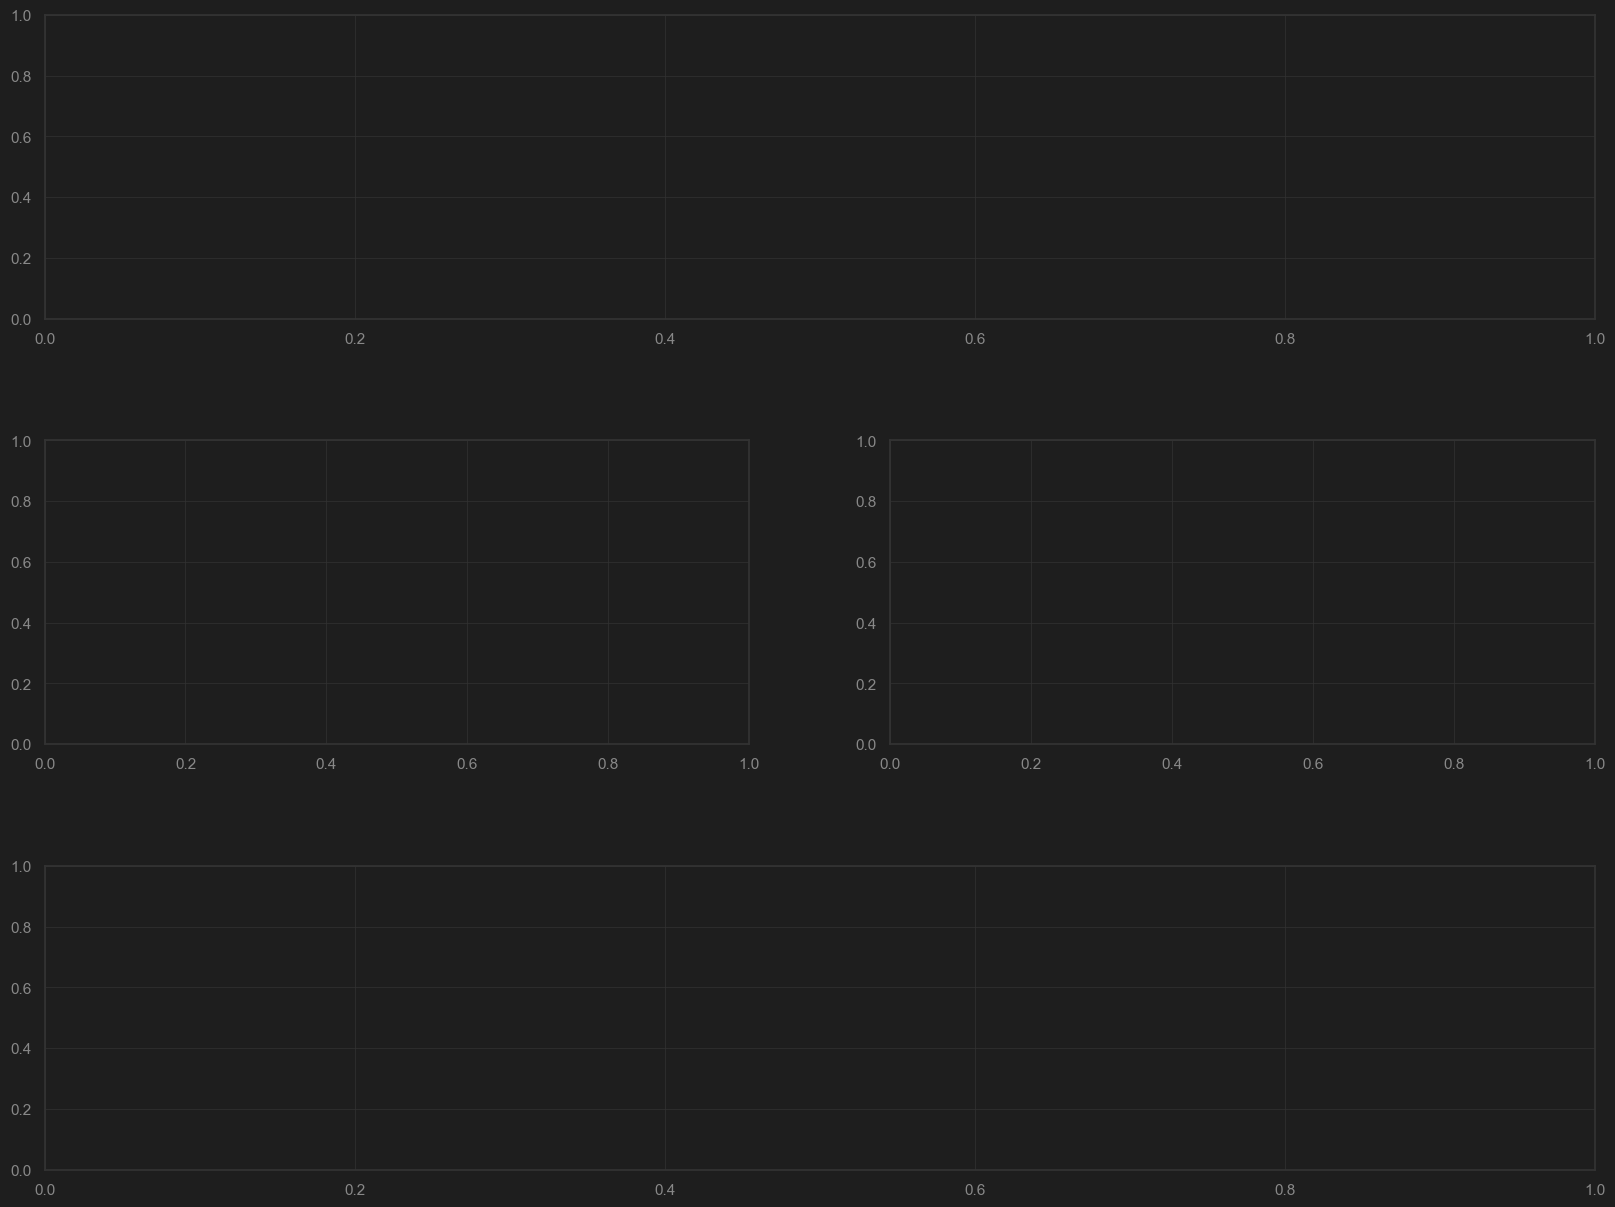

In [7]:
fpl_points( "Totte","Pappa","Frej")


# Player performance 

Method: 
1) Get list of managers players - function 1 
2) Get element ID for each player via bootstrap (https://www.game-change.co.uk/2023/02/10/a-complete-guide-to-the-fantasy-premier-league-fpl-api/) - function 2 
3) Get player performance for each player
4) Breakdown points by midfielder 